In [1]:
import pandas as pd
import json
import requests
import glob
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

LOADING DATASET

In [2]:
df1 = pd.read_csv("G:\\PROJECT\\Singapore Resale Price Prediction\\data\\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df2 = pd.read_csv("G:\\PROJECT\\Singapore Resale Price Prediction\\data\\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df3 = pd.read_csv("G:\\PROJECT\\Singapore Resale Price Prediction\\data\\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df4 = pd.read_csv("G:\\PROJECT\\Singapore Resale Price Prediction\\data\\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df5 = pd.read_csv("G:\\PROJECT\\Singapore Resale Price Prediction\\data\\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df = pd.concat([df1 , df2 , df3, df4, df5],axis=0)
df.head()
df


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN


UNDERSTANDING DATASET

In [3]:
df.shape

(927885, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927885 entries, 0 to 52202
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                927885 non-null  object 
 1   town                 927885 non-null  object 
 2   flat_type            927885 non-null  object 
 3   block                927885 non-null  object 
 4   street_name          927885 non-null  object 
 5   storey_range         927885 non-null  object 
 6   floor_area_sqm       927885 non-null  float64
 7   flat_model           927885 non-null  object 
 8   lease_commence_date  927885 non-null  int64  
 9   resale_price         927885 non-null  float64
 10  remaining_lease      218835 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 85.0+ MB


In [5]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,927885.000000,927885.000000,9.278850e+05
mean,95.690466,1988.282633,3.209782e+05
std,25.823899,10.669926,1.706409e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1981.000000,1.930000e+05
50%,93.000000,1986.000000,2.980000e+05
75%,113.000000,1996.000000,4.180000e+05
max,307.000000,2020.000000,1.588000e+06


CHECKING NULL VALUES

In [6]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

DROPING NULL VALUES

In [7]:
# droping remaining_lease missing values
df = df.dropna()
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

CHECKING UNIUE VALUE COUNT

In [8]:
# checking the unique values in flat_type feature
df['flat_type'].value_counts()

flat_type
4 ROOM              91832
5 ROOM              53886
3 ROOM              53035
EXECUTIVE           16337
2 ROOM               3580
MULTI-GENERATION       83
1 ROOM                 82
Name: count, dtype: int64

In [9]:
# checking the unique values in town feature
df['town'].value_counts()

town
SENGKANG           17649
WOODLANDS          15468
PUNGGOL            15024
JURONG WEST        14912
TAMPINES           14837
YISHUN             14611
BEDOK              12094
HOUGANG            11079
CHOA CHU KANG      10083
ANG MO KIO          9333
BUKIT BATOK         8471
BUKIT MERAH         8345
BUKIT PANJANG       8071
TOA PAYOH           6774
KALLANG/WHAMPOA     6607
PASIR RIS           6583
SEMBAWANG           5982
QUEENSTOWN          5978
GEYLANG             5474
CLEMENTI            5014
JURONG EAST         4565
SERANGOON           4146
BISHAN              3972
CENTRAL AREA        1875
MARINE PARADE       1344
BUKIT TIMAH          544
Name: count, dtype: int64

In [10]:
df['storey_range'].value_counts()

storey_range
04 TO 06    50762
07 TO 09    46374
10 TO 12    40965
01 TO 03    39063
13 TO 15    20583
16 TO 18     9472
19 TO 21     4032
22 TO 24     2863
25 TO 27     1697
28 TO 30     1099
31 TO 33      579
34 TO 36      527
37 TO 39      460
40 TO 42      224
43 TO 45       65
46 TO 48       53
49 TO 51       17
Name: count, dtype: int64

In [11]:
df['flat_model'].value_counts()

flat_model
Model A                   74480
Improved                  54229
New Generation            28891
Premium Apartment         24039
Simplified                 8853
Apartment                  8191
Maisonette                 6193
Standard                   6151
DBSS                       3239
Model A2                   2660
Type S1                     436
Model A-Maisonette          396
Adjoined flat               367
Type S2                     217
Terrace                     122
Premium Apartment Loft      108
2-room                      102
Multi Generation             83
3Gen                         32
Improved-Maisonette          30
Premium Maisonette           16
Name: count, dtype: int64

CHECKING UNIQUE COLUMNS

In [12]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

CHECKING DATA TYPES

In [13]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

MONTH IS IN OBJECT CONVERTING TO DATETIME FORMAT

In [14]:

# Convert the 'month' column to a datetime format
df['month'] = pd.to_datetime(df['month'])

# Extract the year and month into separate columns
df['year'] = df['month'].dt.year
df['month_of_year'] = df['month'].dt.month
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,month_of_year
0,2015-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,2015,1
1,2015-01-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65,2015,1
2,2015-01-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64,2015,1
3,2015-01-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63,2015,1
4,2015-01-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181677,2024-05-01,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,154.0,Maisonette,1988,948000.0,62 years 09 months,2024,5
181678,2024-06-01,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62 years 08 months,2024,6
181679,2024-06-01,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,1000000.0,62 years 08 months,2024,6
181680,2024-02-01,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62 years 11 months,2024,2


In [15]:
df.dtypes

month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
resale_price                  float64
remaining_lease                object
year                            int32
month_of_year                   int32
dtype: object

In [16]:

df['lease_commence_year'] = pd.to_datetime(df['lease_commence_date'],format = '%Y').dt.year

In [17]:
# Extract the remaining_lease feature

data = df['remaining_lease']
house_new = pd.DataFrame(data)

# Extract years and months using regular expressions
lease_info = df['remaining_lease'].str.extract(r'(\d+) years (\d+) months')
lease_info.columns = ['years', 'months']

# Convert to numeric values
df['remaining_lease_years'] = pd.to_numeric(lease_info['years'])
df['remaining_lease_months'] = pd.to_numeric(lease_info['months'])



COPYING DATASET FOR FURTHER USE

In [18]:
df_new_data = df.copy()

In [19]:
df_new_data.isnull().sum()

month                         0
town                          0
flat_type                     0
block                         0
street_name                   0
storey_range                  0
floor_area_sqm                0
flat_model                    0
lease_commence_date           0
resale_price                  0
remaining_lease               0
year                          0
month_of_year                 0
lease_commence_year           0
remaining_lease_years     66874
remaining_lease_months    66874
dtype: int64

HANDLING NULL VALUES
IMPUTATION

In [20]:
# handleing the null values using mean method
df_new_data['remaining_lease_years'].fillna(df['remaining_lease_years'].mean(),inplace = True)
df_new_data['remaining_lease_months'].fillna(df['remaining_lease_months'].mean(),inplace = True)
df_new_data.isnull().sum()

month                     0
town                      0
flat_type                 0
block                     0
street_name               0
storey_range              0
floor_area_sqm            0
flat_model                0
lease_commence_date       0
resale_price              0
remaining_lease           0
year                      0
month_of_year             0
lease_commence_year       0
remaining_lease_years     0
remaining_lease_months    0
dtype: int64

DROPING EXISTING COLUMNS

In [21]:
#  dropping the existing features 

df_new_data.drop(columns=['month','lease_commence_date','remaining_lease'],inplace = True)

ENCODING--- LABEL ENCODER

CONVERTING CATEGORICAL COLUMN TO NUMERICAL COLUMN

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
encoder = LabelEncoder()
df_new_data['town'] = encoder.fit_transform(df_new_data['town'])
df_new_data['flat_type'] = encoder.fit_transform(df_new_data['flat_type'])
df_new_data['storey_range'] = encoder.fit_transform(df_new_data['storey_range'])
df_new_data['flat_model'] = encoder.fit_transform(df_new_data['flat_model'])

In [24]:
# after encoding descriptive statistics analaysis

df_new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
town,218835.0,13.891905,7.955760,0.0,8.0,14.000000,21.0,25.0
flat_type,218835.0,3.120493,0.919194,0.0,2.0,3.000000,4.0,6.0
storey_range,218835.0,2.219905,1.948108,0.0,1.0,2.000000,3.0,16.0
floor_area_sqm,218835.0,97.124335,24.054197,31.0,81.0,93.000000,112.0,280.0
flat_model,218835.0,8.690904,3.645689,0.0,5.0,8.000000,12.0,20.0
resale_price,218835.0,487719.815741,168630.702700,140000.0,365000.0,455000.000000,580000.0,1588000.0
year,218835.0,2019.619293,2.690431,2015.0,2017.0,2020.000000,2022.0,2024.0
month_of_year,218835.0,6.495944,3.400867,1.0,4.0,7.000000,9.0,12.0
lease_commence_year,218835.0,1995.153810,13.692743,1966.0,1985.0,1995.000000,2005.0,2020.0
remaining_lease_years,218835.0,74.030080,11.609909,41.0,66.0,74.030080,80.0,97.0


DATA VISUALIZATION

In [25]:
# find outliers - box plot & skewed data - hist plot and violin plot

def plot(df_new_data,column):
    plt.figure(figsize =(15,6))
    plt.subplot(1,3,1)
    sns.boxplot(data = df_new_data ,x = column)
    plt.title(f'box plot for {column}')
    

    plt.subplot(1,3,2)
    sns.histplot(data = df_new_data ,x = column,kde = True ,bins = 40)
    plt.title(f'distribution  plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df_new_data, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

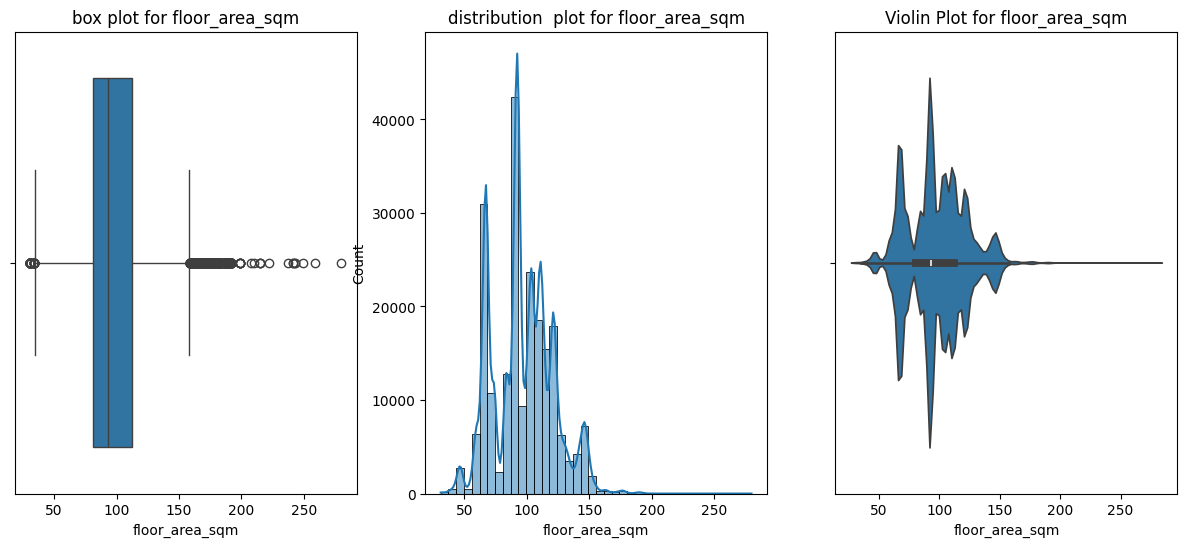

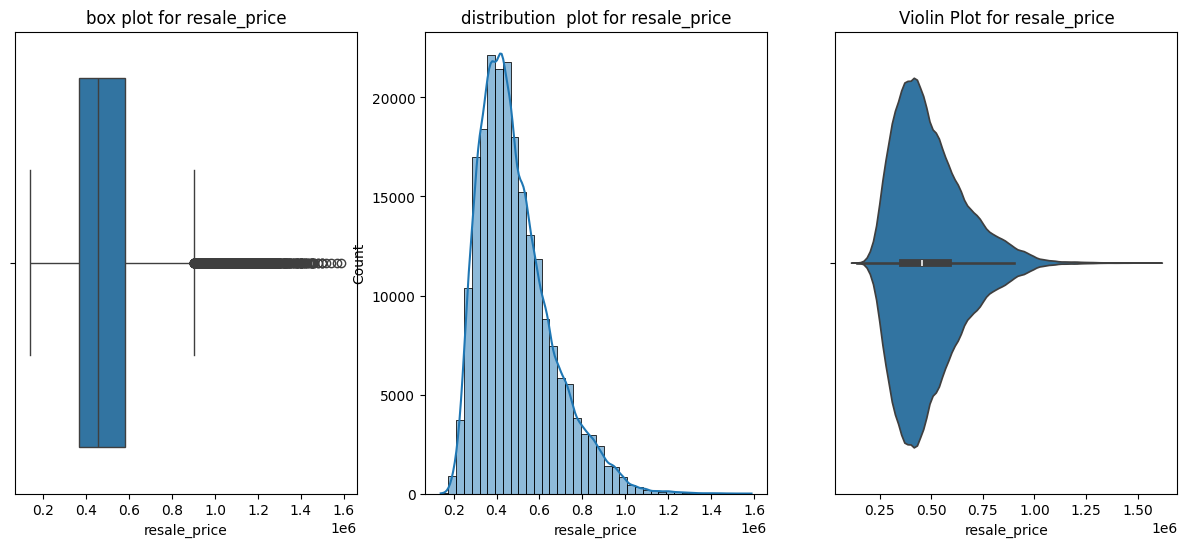

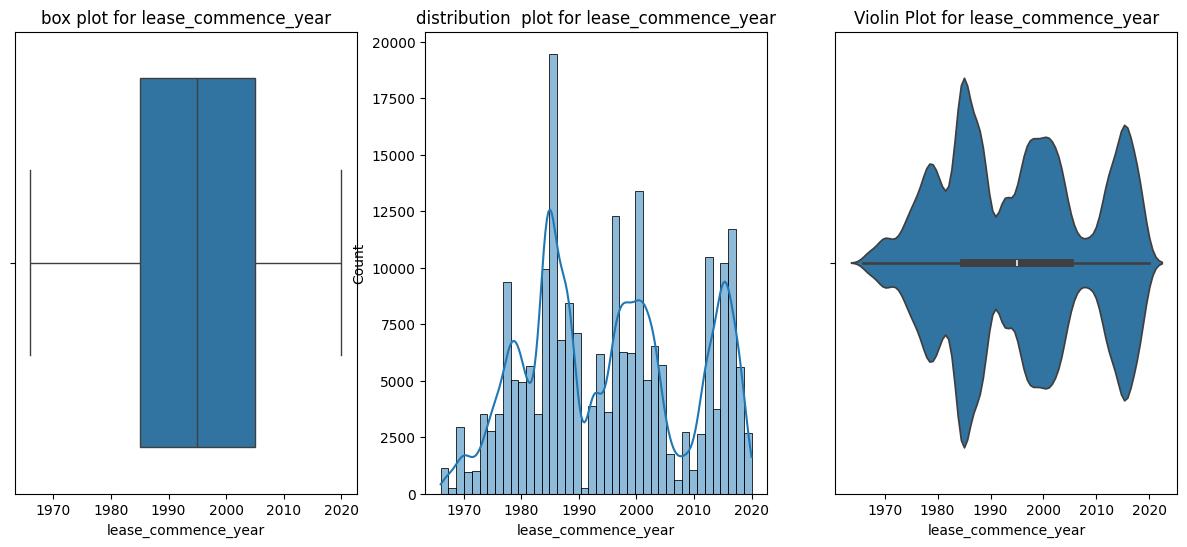

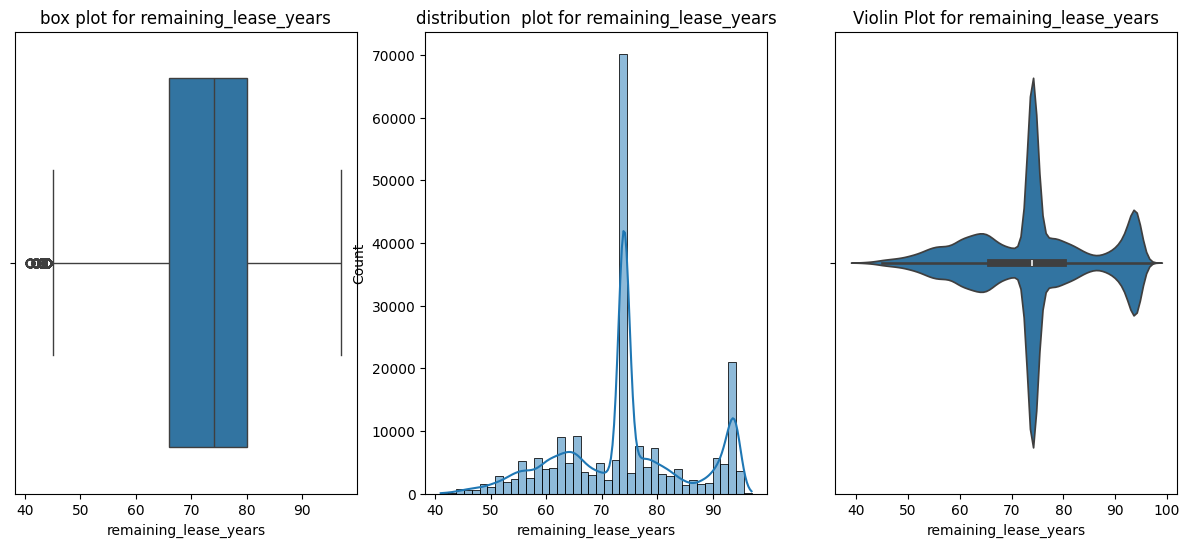

In [26]:
for i in ['floor_area_sqm','resale_price','lease_commence_year','remaining_lease_years']:
    plot(df_new_data ,i)

HANDLING SKEWED DATA USING LOG TRANSFORMATION

In [27]:
# 'floor_area_sqm','resale_price' this two feature are skewd.
# so using the log transformation method to handle the skewness data


df_new_data['floor_area_sqm'] = np.log(df_new_data['floor_area_sqm'])
df_new_data['resale_price'] = np.log(df_new_data['resale_price'])

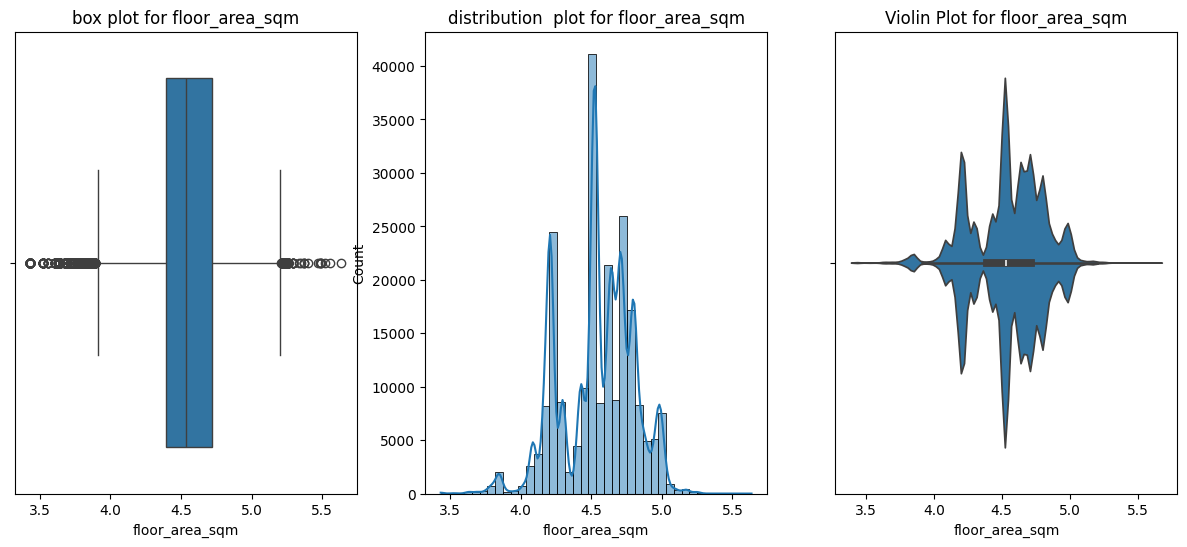

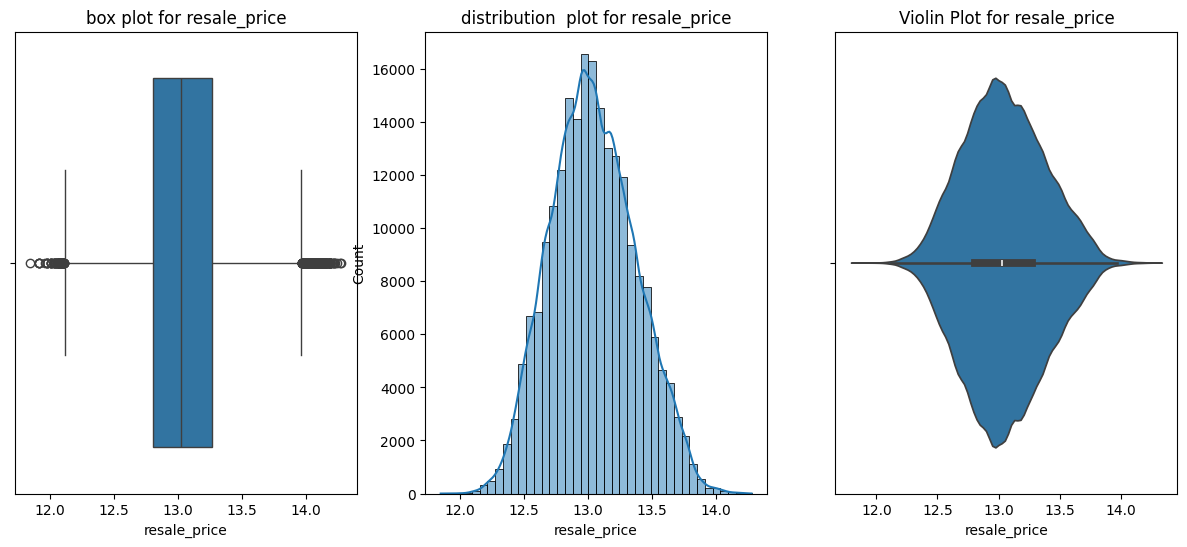

In [28]:
for i in ['floor_area_sqm','resale_price']:
    plot(df_new_data,i)

OUTLIER TREATMENT

In [29]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe
# formula IQR = Q3_Q1
def outlier(df_new_data ,column):
    IQR = df_new_data[column].quantile(0.75)-df_new_data[column].quantile(0.25)
    upper_value = df_new_data[column].quantile(0.75)+1.5*IQR
    lower_value = df_new_data[column].quantile(0.25)-1.5*IQR
    
    df_new_data[column] =     df_new_data[column].clip(upper_value,lower_value)


In [30]:

# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features


outlier(df_new_data, 'floor_area_sqm')
outlier(df_new_data, 'resale_price')
df_new_data1 = df_new_data.copy()

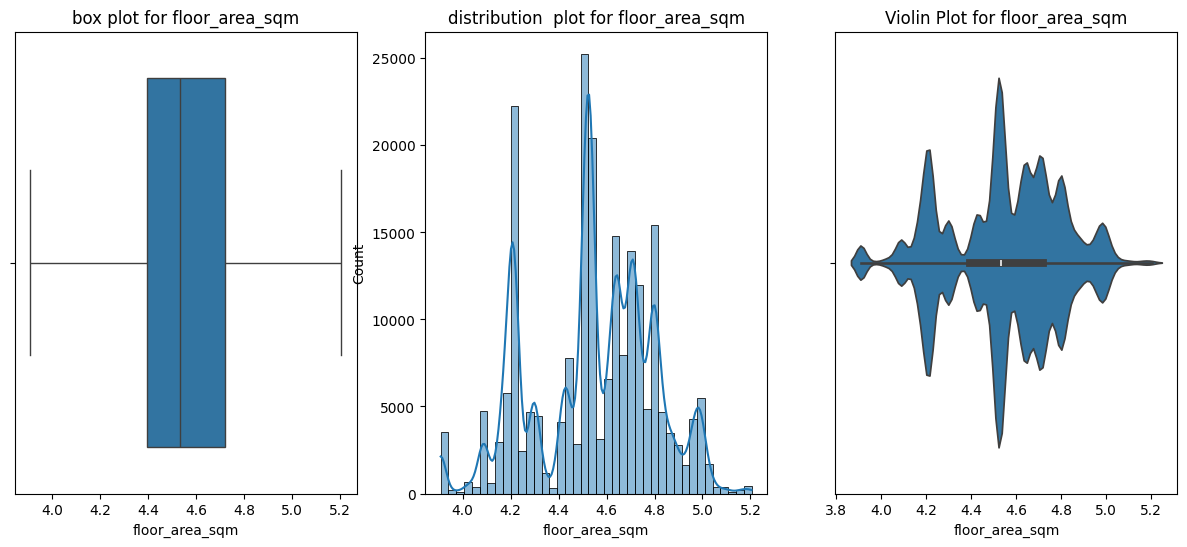

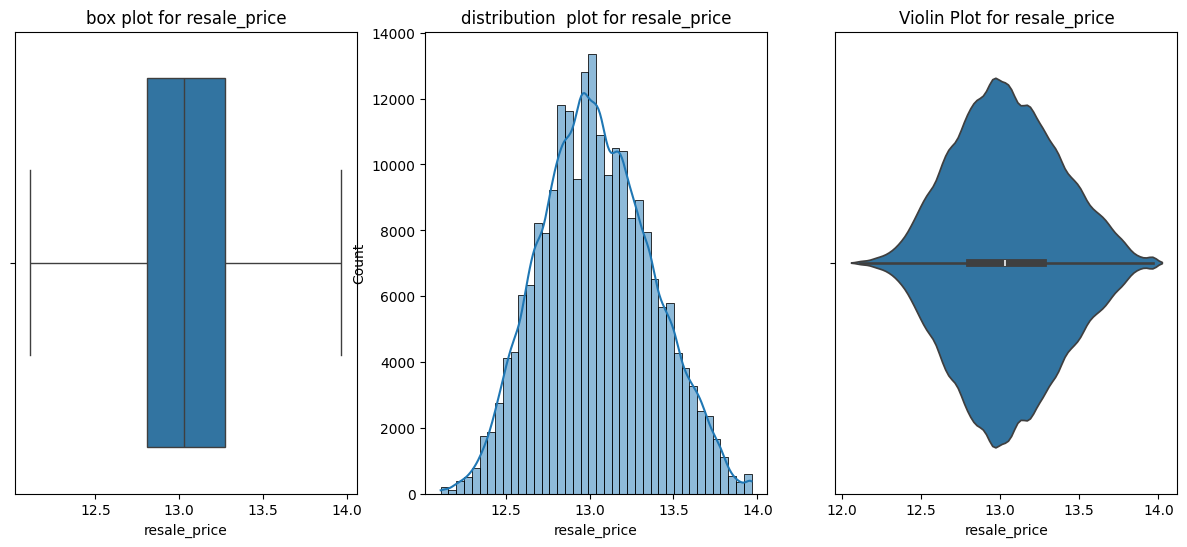

In [31]:
# after IQR using checking the skewness
for i in ['floor_area_sqm','resale_price']:
    plot(df_new_data1,i)

In [32]:
df_new_data1.describe().T

,count,mean,std,min,25%,50%,75%,max
town,218835.0,13.891905,7.955760,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,218835.0,3.120493,0.919194,0.000000,2.000000,3.000000,4.000000,6.000000
storey_range,218835.0,2.219905,1.948108,0.000000,1.000000,2.000000,3.000000,16.000000
floor_area_sqm,218835.0,4.545604,0.252653,3.908375,4.394449,4.532599,4.718499,5.204573
flat_model,218835.0,8.690904,3.645689,0.000000,5.000000,8.000000,12.000000,20.000000
resale_price,218835.0,13.041547,0.331416,12.112957,12.807653,13.028053,13.270783,13.965480
year,218835.0,2019.619293,2.690431,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
month_of_year,218835.0,6.495944,3.400867,1.000000,4.000000,7.000000,9.000000,12.000000
lease_commence_year,218835.0,1995.153810,13.692743,1966.000000,1985.000000,1995.000000,2005.000000,2020.000000
remaining_lease_years,218835.0,74.030080,11.609909,41.000000,66.000000,74.030080,80.000000,97.000000


In [33]:


def create_visualizations(df, df_new_data):
    plt.figure(figsize=(15, 6))
    sns.boxplot(y='flat_model', x='resale_price', data=df)
    plt.title('Resale Price by Flat Model')
    plt.show()

    plt.figure(figsize=(15, 6))
    sns.violinplot(y='town', x='resale_price', data=df)
    plt.title('Resale Price by Town')
    plt.show()

    plt.figure(figsize=(15, 6))
    sns.barplot(y='flat_type', x='resale_price', data=df)
    plt.title('Resale Price by Flat Type')
    plt.show()

    
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='lease_commence_year', y='resale_price', data=df_new_data)
    plt.title('Resale Price over Lease Commence Year')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.lineplot(x='year', y='resale_price', data=df_new_data)
    plt.title('Resale Price over Year')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.lineplot(x='remaining_lease_years', y='resale_price', data=df_new_data)
    plt.title('Resale Price over Remaining Lease Years')
    plt.show()

# Example usage
# create_visualizations(df, df_new_data)


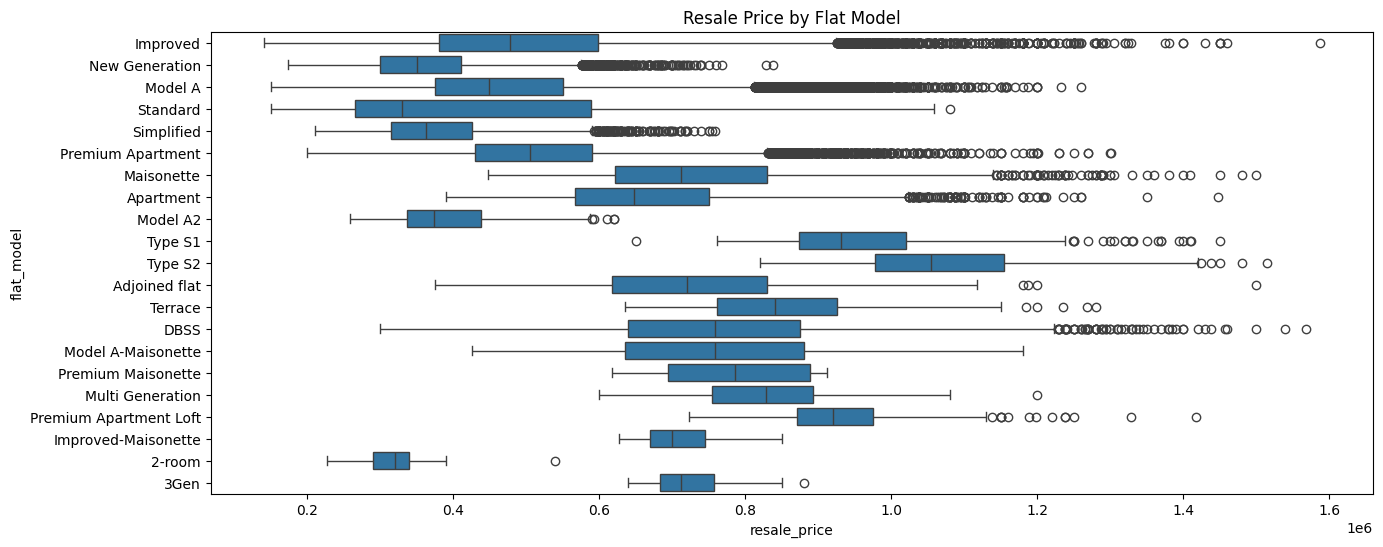

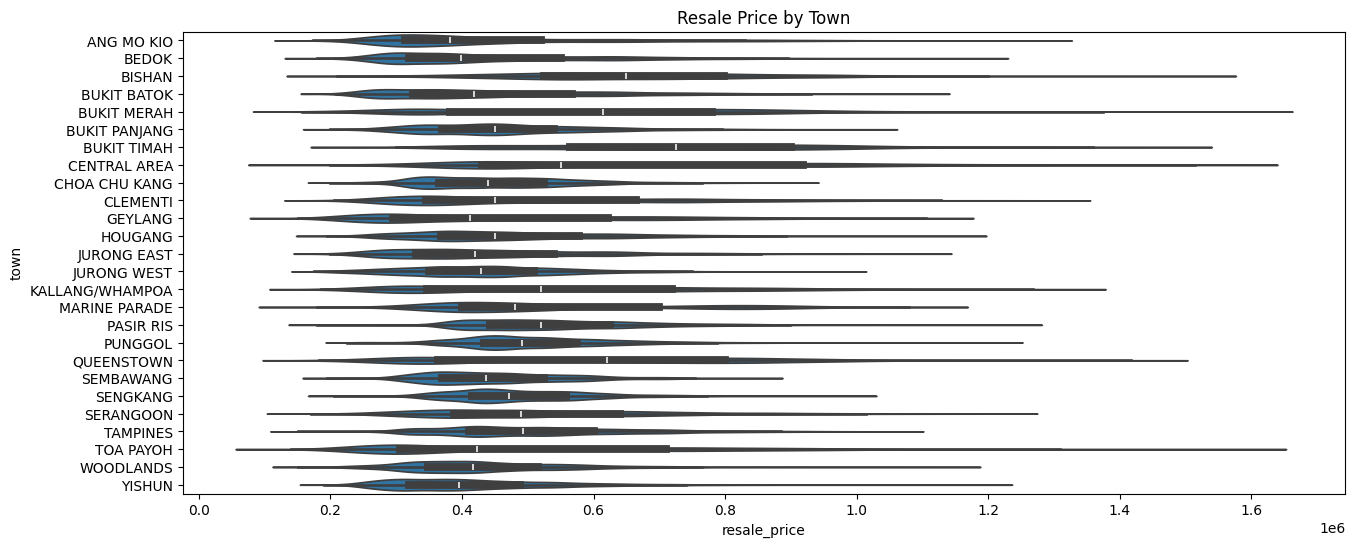

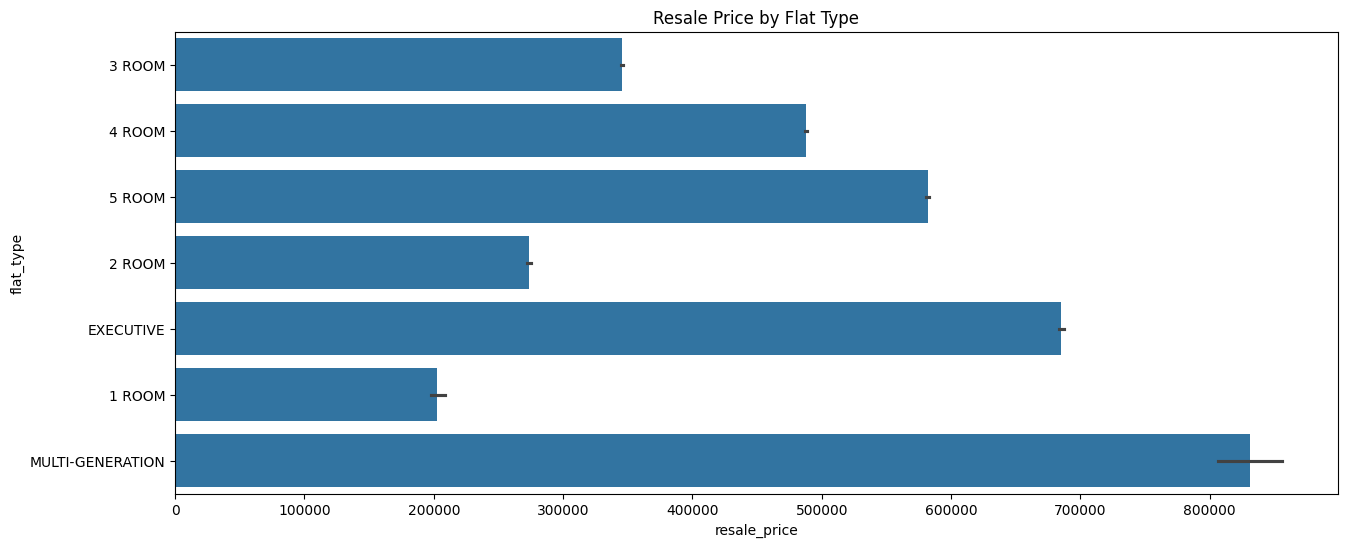

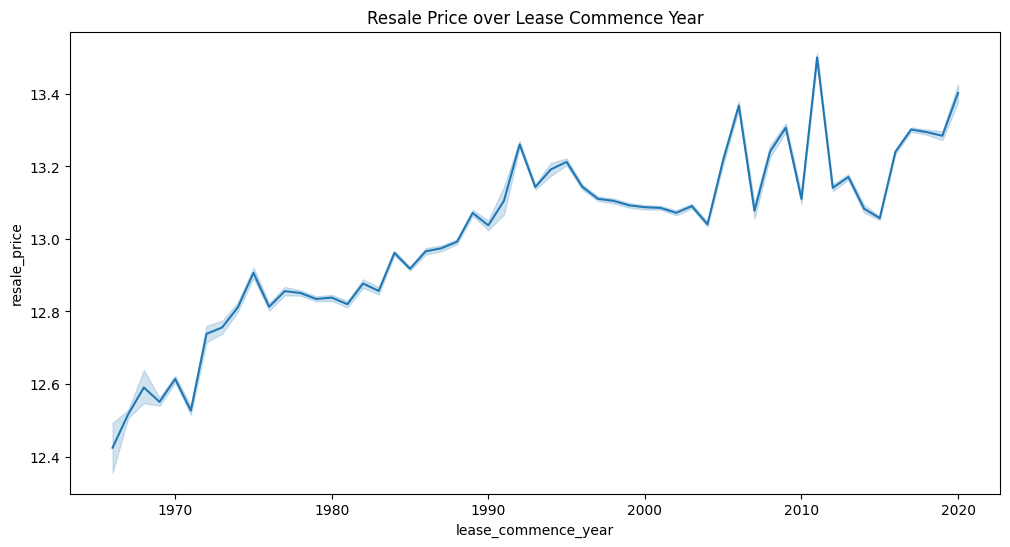

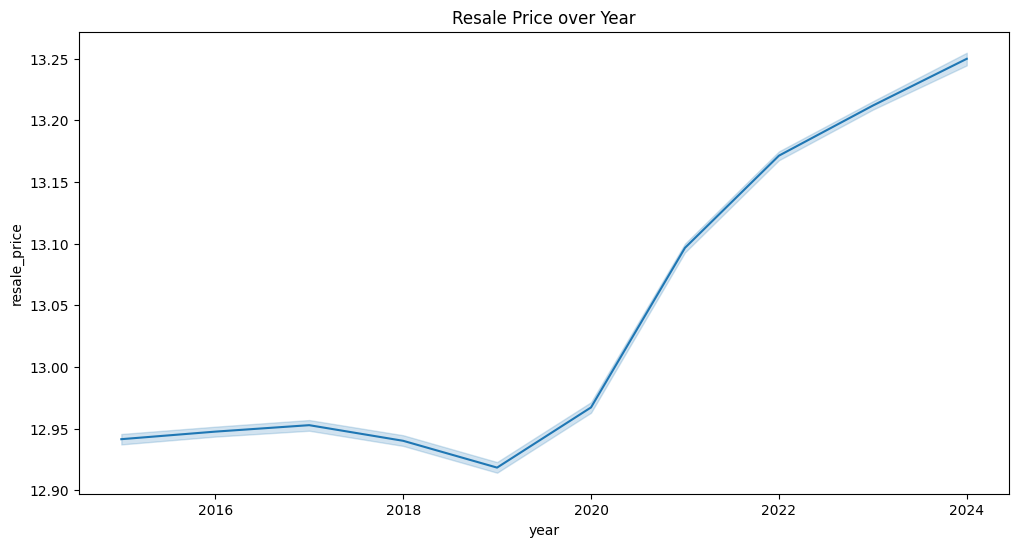

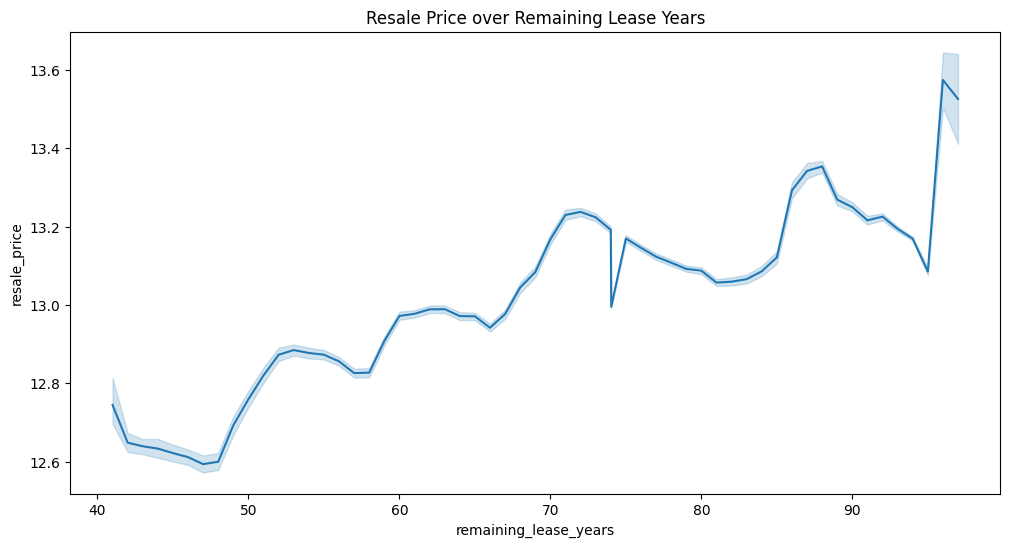

In [34]:
create_visualizations(df, df_new_data)

DROPPING

In [35]:
# dropping the irrelvent feature 
df_new_data.drop(columns=['block','street_name'],inplace = True)
df_new_data

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,0,2,2,4.094345,5,12.449019,2015,1,1986,74.03008,6.533426
1,0,2,0,4.219508,12,12.524526,2015,1,1981,74.03008,6.533426
2,0,2,0,4.234107,12,12.560244,2015,1,1980,74.03008,6.533426
3,0,2,0,4.219508,12,12.577636,2015,1,1979,74.03008,6.533426
4,0,2,2,4.219508,12,12.577636,2015,1,1980,74.03008,6.533426
...,...,...,...,...,...,...,...,...,...,...,...
181677,25,5,1,5.036953,7,13.762110,2024,5,1988,62.00000,9.000000
181678,25,5,3,4.983607,7,13.815511,2024,6,1988,62.00000,8.000000
181679,25,5,1,4.983607,7,13.815511,2024,6,1988,62.00000,8.000000
181680,25,6,1,5.099866,11,13.813509,2024,2,1987,62.00000,11.000000


In [36]:
df_new_data.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'resale_price', 'year', 'month_of_year', 'lease_commence_year',
       'remaining_lease_years', 'remaining_lease_months'],
      dtype='object')

In [37]:
final_df = df_new_data

In [ ]:
#Purpose of Correlation Analysis:
#Identifying Redundancies: Highly correlated columns provide similar information, so one of the columns might be redundant. 
    #For instance, if two columns have a correlation coefficient greater than or equal to 0.7 (in absolute value), 
    #they are considered highly correlated.
#Reducing Multicollinearity: In predictive modeling, especially in regression analysis, multicollinearity 
    #(when predictor variables are highly correlated) can lead to unstable estimates and affect the model's performance. 
    #By removing one of the highly correlated columns, you can reduce multicollinearity.

In [ ]:
#correlation matrix will show the correlation coefficients between the numeric columns in your dataset.
# Need to verify any columns are highly correlated using Heatmap. 
# If any columns correalaion value >= 0.7 (absolute value), drop the columns.

SPLITING NUMERICAL COLUMN 

In [38]:
numeric_df = df_new_data.select_dtypes(include=['int32', 'float64'])

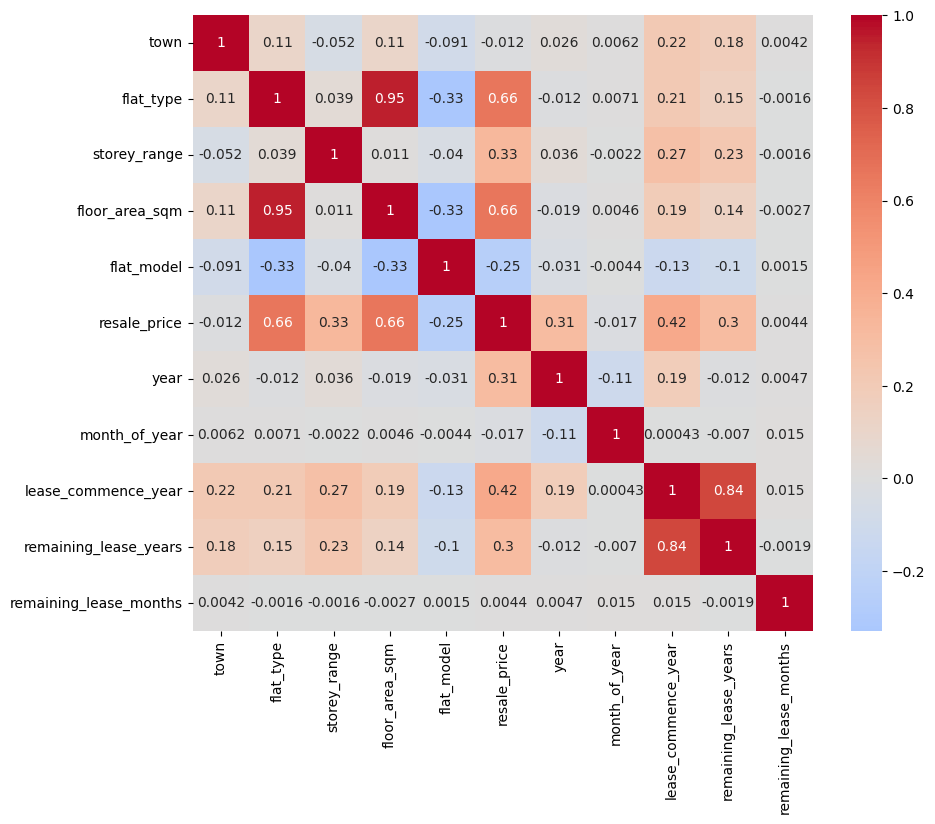

In [39]:


# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heat map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Show the plot
plt.show()

MODEL BUILDING

IMPORTING LIBRARIES

In [40]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
#R2 Score: Measures the proportion of variance explained by the model.
#MAE: Measures the average magnitude of the errors.
#MSE: Measures the average squared difference between estimated and actual values.
#RMSE: The square root of MSE, provides error magnitude.
#MSLE: Measures the average squared difference between the logarithms of estimated and actual values.
#MAPE: Measures the accuracy as a percentage of the error.

In [41]:

def machine_learning_delivery_date(final_df, algorithm):
    x = final_df.drop(columns=['resale_price'], axis=1)
    y = final_df['resale_price']

    # Standardize the features of a dataset
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    # Train test splitting
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics = {
        'Algorithm': algorithm.__name__,
        'R2': r2,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse
    }

    return metrics




In [42]:
final_df = df_new_data

metrics_lr = machine_learning_delivery_date(final_df, LinearRegression)
metrics_dtr = machine_learning_delivery_date(final_df, DecisionTreeRegressor)
metrics_rfr = machine_learning_delivery_date(final_df, RandomForestRegressor)

print(metrics_lr)
print(metrics_dtr)
print(metrics_rfr)

{'Algorithm': 'LinearRegression', 'R2': 0.6798654267302862, 'Mean Absolute Error': 0.14649495359104642, 'Mean Squared Error': 0.035125859409902586, 'Root Mean Squared Error': 0.1874189409048685}
{'Algorithm': 'DecisionTreeRegressor', 'R2': 0.9205057777422471, 'Mean Absolute Error': 0.06633993634691306, 'Mean Squared Error': 0.008722278404378577, 'Root Mean Squared Error': 0.09339313895773381}
{'Algorithm': 'RandomForestRegressor', 'R2': 0.9560263324953189, 'Mean Absolute Error': 0.05074839902642058, 'Mean Squared Error': 0.004824886130639487, 'Root Mean Squared Error': 0.0694614002928208}


In [ ]:
#If metrics_rfr shows a very high R2 score and very low errors for training data 
#but significantly worse metrics for testing data, it indicates overfitting.

In [ ]:
# select the model with the highest R2 value and 
# the lowest values for MAE, MSE, and RMSE, indicating better predictive performance and a better fit to the data.

In [ ]:
# Random Forest algorithm is low bias and reduce overfitting compared to others.

Initial Validation with RandomForestRegressor
This section validates the best-performing model before hyperparameter tuning.

In [43]:
# Train test split
x = final_df.drop(columns=['resale_price'], axis=1)
y = final_df['resale_price']

scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Initialize and fit the model
RFR = RandomForestRegressor(n_estimators=50, random_state=0)
RFR.fit(x_train, y_train)

# Predictions
y_pred_train = RFR.predict(x_train)
y_pred_test = RFR.predict(x_test)

# Metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("R2 Score Train:", r2_train)
print("R2 Score Test:", r2_test)


R2 Score Train: 0.9927857744882644
R2 Score Test: 0.9549396317793515


In [ ]:
# r2_train is significantly higher than r2_test, this suggests overfitting.



In [ ]:
# we got good accuracy after oversampling
# RandomForestRegressor have good testing accuracy, but in training accuracy is overfitting.


In [ ]:
# GridsearchCV is a cross validation function.

# Hyper parameter tuning - we give parameter values manually in the algorithm to reduce the overfitting issue and get better accuracy.

# so using gridserachcv method - to pass the mulitiple values in each parameters and it try to evaluate all the combination of values and
# finally return the best accuracy parameter values based on the score.

# example: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}


Hyperparameter Tuning
This section uses GridSearchCV to find the best hyperparameters.

In [44]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [20],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best CV Score:", best_score)


Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best CV Score: 0.9285125794932496


Validation with Tuned Hyperparameters
This section validates the model using the best hyperparameters found.

In [45]:
# Initialize the model with tuned hyperparameters
best_model = RandomForestRegressor(
    max_depth=20,
    max_features='log2',
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=42
)

# Fit the model
best_model.fit(x_train, y_train)

# Predictions
y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

# Metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R2:', r2_score(y_test, y_pred_test))


Mean Squared Error: 0.0074395693110491995
Mean Absolute Error: 0.06267709804062538
Root Mean Squared Error: 0.08625293798502866
R2: 0.9319234343571006


Techniques to Address Overfitting
Simplify the Model: Reduce max_depth, n_estimators, etc.
Cross-Validation: Ensure cross-validation is properly performed to get a more accurate estimate of model performance.
Regularization: For RandomForestRegressor, regularization can be indirectly controlled by parameters like max_depth, min_samples_split, min_samples_leaf, and max_features.
Early Stopping: Not applicable directly to RandomForest, but you can stop adding more trees if no significant improvement is observed.

Model Performance Check: Determines the best algorithm based on initial metrics.
Initial Validation: Validates the chosen model before tuning.
Hyperparameter Tuning: Uses GridSearchCV to find the best hyperparameters.
Validation with Tuned Hyperparameters: Validates the model with the best hyperparameters.

MANUAL PREDICTING

In [46]:

# will pass the user data manually to check the prediction of status ar our model

user_data = np.array([[0,1,3,3.785069,5,2017,1,1979,61.000000,4.000000]])
y_prediction = best_model.predict(user_data)
y_prediction[0]

13.79548968720955

In [47]:

# Assuming `best_model` is already trained and ready to use
user_data = np.array([[4, 3, 2, 4.785069, 4, 2023, 3, 1989, 69.000000, 4.000000]])

# Predict the log resale price
y_prediction_log = best_model.predict(user_data)

# Convert the log resale price back to the original price
y_prediction = np.exp(y_prediction_log[0])

print(y_prediction)


841864.4320159677


SAVING IN PICKLE

In [48]:
import pickle

In [49]:

with open('regression_model.pkl', 'wb') as f:
    pickle.dump(best_model, f) # load the model


In [52]:
with open("G:\\PROJECT\\Singapore-Resale-Flat-Prices-Predicting\\regression_model.pkl", 'rb') as f:
    model = pickle.load(f)

# Predicting
user_data = np.array([[4, 3, 2, 4.785069, 4, 2023, 3, 1989, 69.000000, 4.000000]])
prediction = model.predict(user_data)
predicted_price = prediction[0]
original_price = np.exp(predicted_price)
print(original_price)

841864.4320159677
